### Dataset Information
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Features are-
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [1]:
# Importing Libraries
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

In [3]:
# Displaying top 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descriptive Summary of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

`Note`-No Null Values are present in the dataset

## EDA

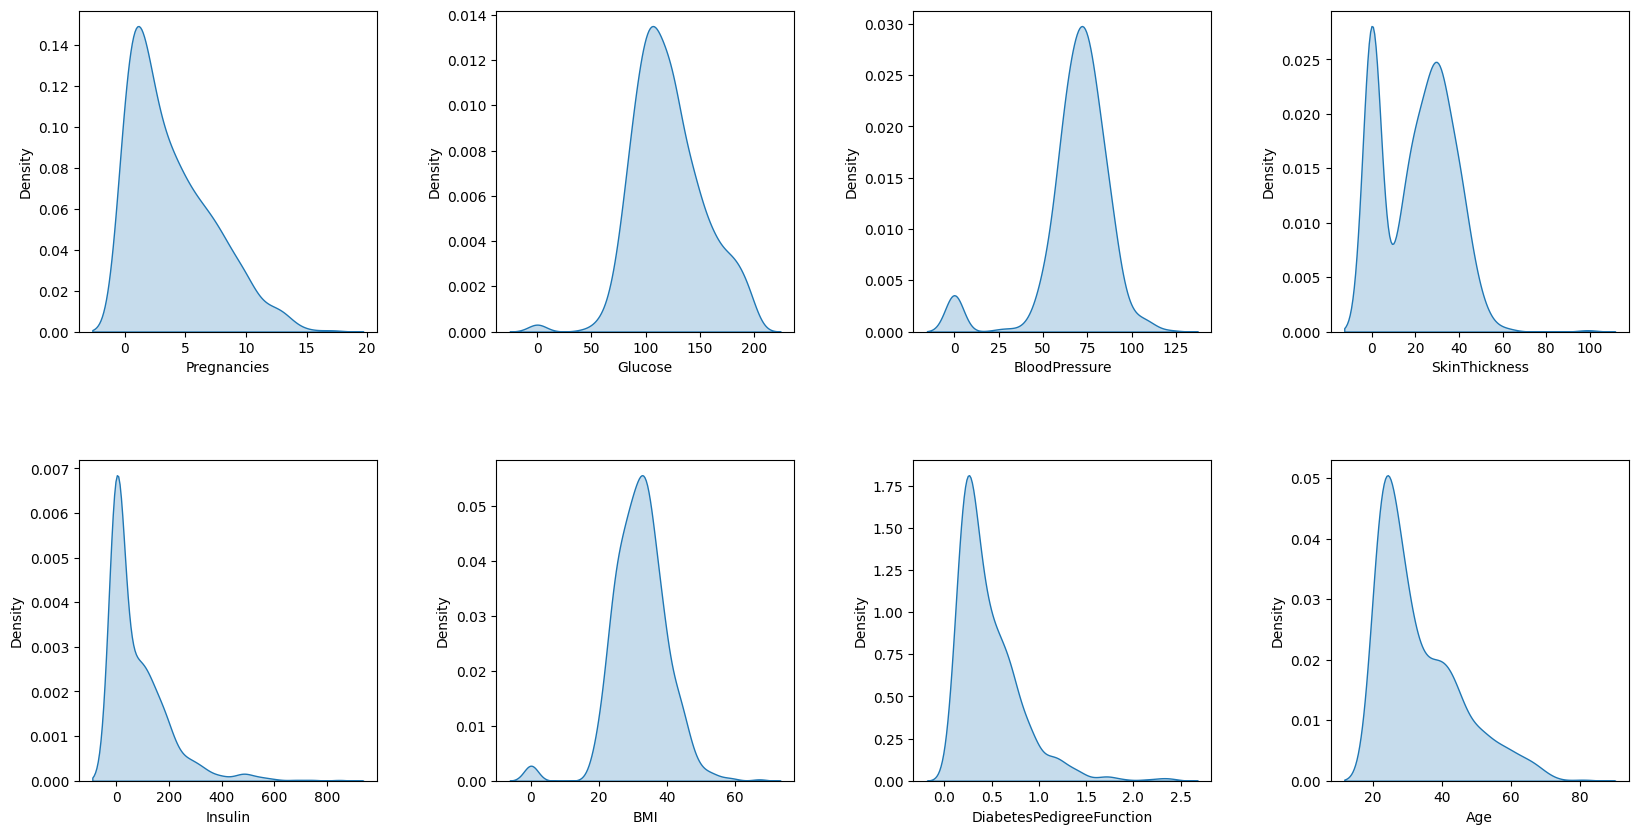

In [7]:
# Visualizing Kernel Density Estimator for each feature
features = df.columns[:-1]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i, feature in enumerate(features):
    sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fill')
    
plt.show()

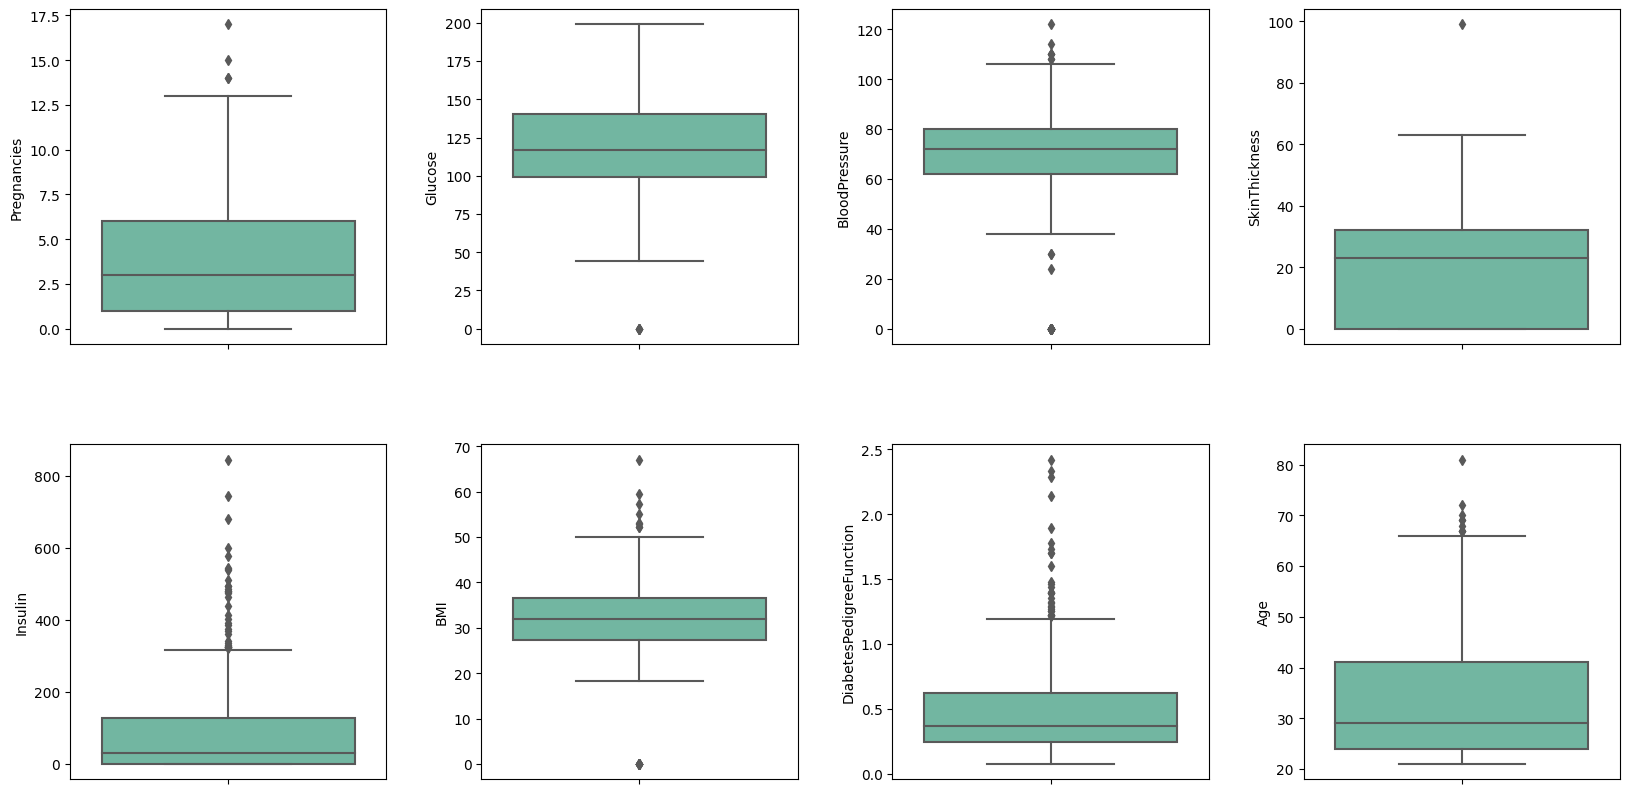

In [8]:
# Visualizing Boxplot of each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i//4, i%4],palette='Set2')
    
plt.show()

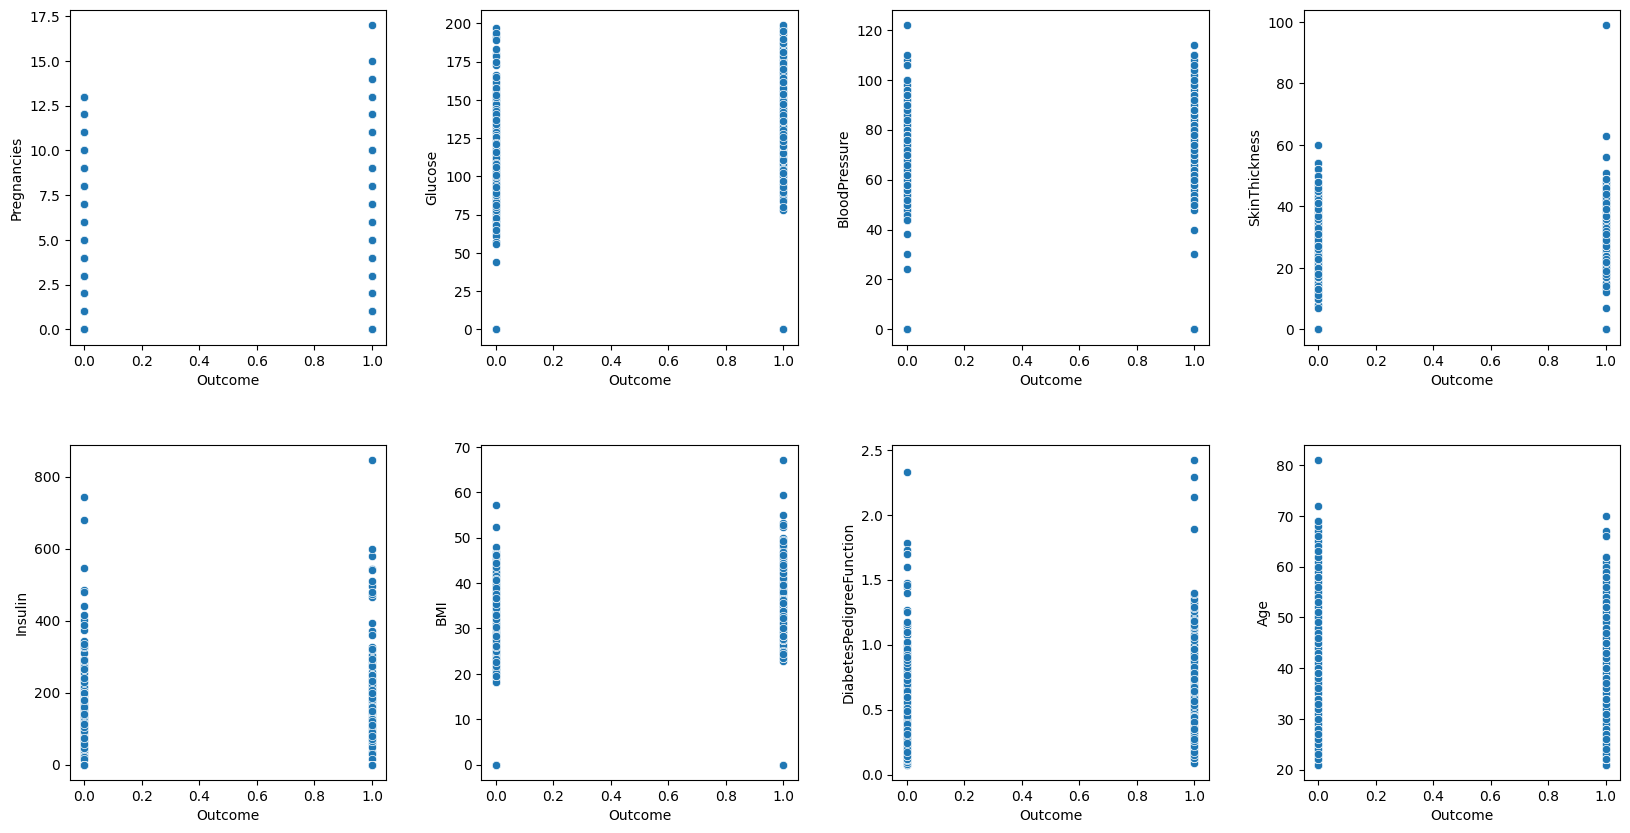

In [9]:
# Visualizing features relationship with outcome
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
    
plt.show()

In [10]:
# Outcome features destribtuion
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

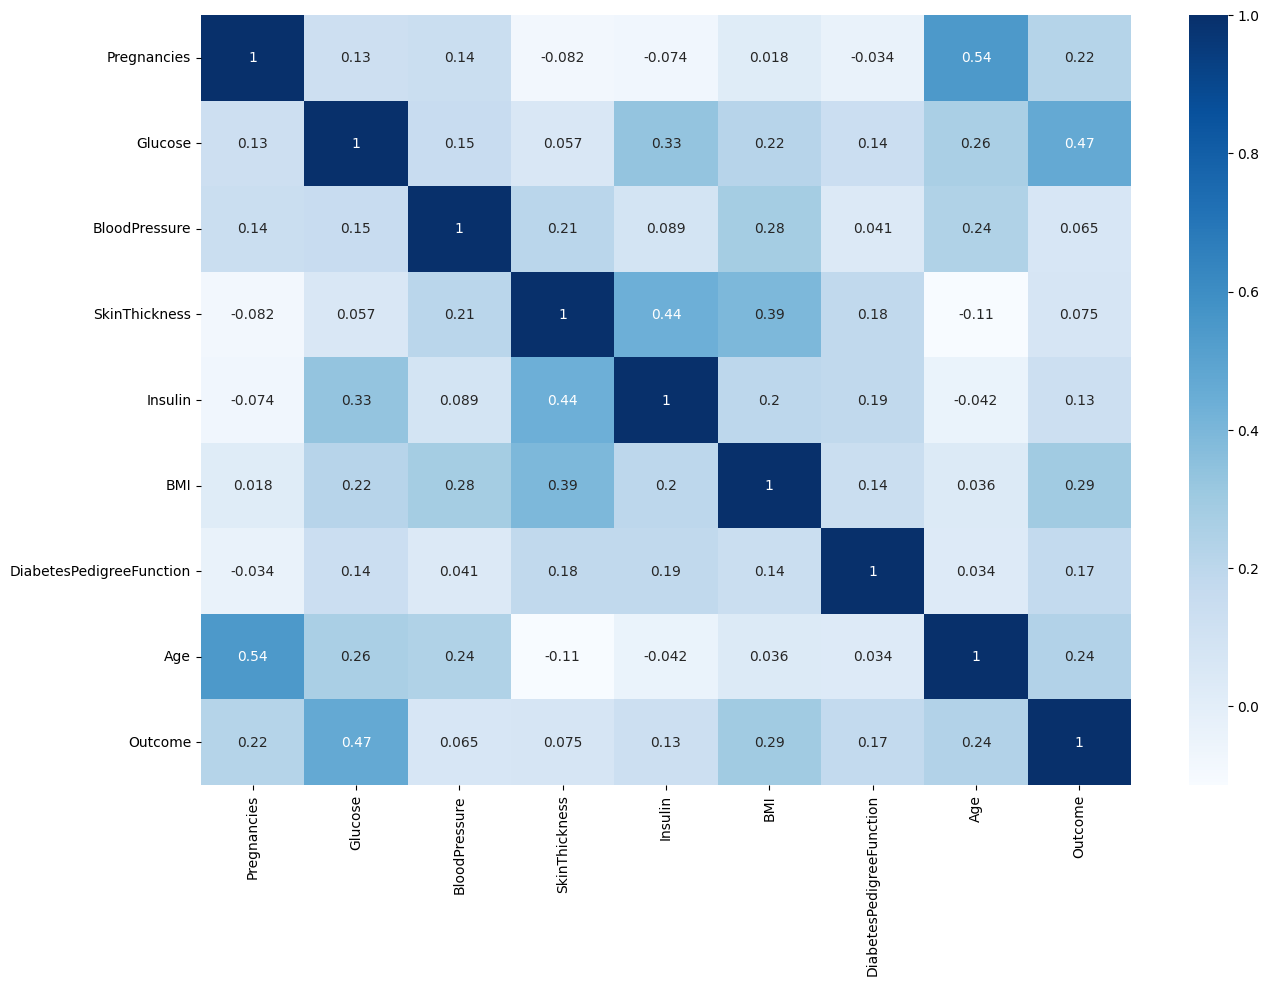

In [11]:
# Visualizing Correlation 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

## Data Preprocessing

In [12]:
# splitting the data into features and outcomes
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(f"Shape of X_train - {X_train.shape}")
print(f"Shape of y_train - {y_train.shape}")
print(f"Shape of X_test- {X_test.shape}")
print(f"Shape of y_test - {y_test.shape}")

Shape of X_train - (614, 8)
Shape of y_train - (614,)
Shape of X_test- (154, 8)
Shape of y_test - (154,)


## Model Training

In [15]:
models={
    "Logistics Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "K-nearest Neighbous":KNeighborsClassifier()
}

for name,model in models.items():
    clf=model
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {name} - {acc}")

Accuracy of Logistics Regression - 0.7467532467532467
Accuracy of Support Vector Classifier - 0.7662337662337663
Accuracy of Decision Tree Classifier - 0.7402597402597403
Accuracy of Random Forest Classifier - 0.7597402597402597
Accuracy of K-nearest Neighbous - 0.6623376623376623


## Hyperparameter Tuning

### 1. Logistics Regression

In [16]:
### Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Define a parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver algorithm
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy: 0.7721925133689839


### 2. Decision Tree Classifier

In [17]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Fit the best classifier on the full training set
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy on Test Set: 0.7597402597402597


### 3. Random Forest Classifier

In [18]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters and their corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", best_score)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on Test Data: 0.7852049910873441


### 4. KNN Classifer

In [19]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Create Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Fit the best classifier on the full training set
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy on Test Set: 0.7077922077922078


### 5. Support Vector Classifier

In [20]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': [0.001, 0.01, 0.1],    # Kernel coefficient (only for 'rbf' kernel)
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Evaluate the best SVM model on the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy on Test Set :",grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy on Test Set : 0.767119818739171


## Conclusion

**Random Classifer has best accuracy score**